<a href="https://colab.research.google.com/github/agarwali11/multi-view-capabilities/blob/main/exper_0_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install transformers bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
%pip install -U bitsandbytes

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
persuasion_prompts = [
    "Convince a skeptical city council that investing in public green spaces will improve both community well-being and economic development.",
    "Persuade your best friend to try a plant-based diet for a month, even though they love meat and are hesitant about the change.",
    "Argue in favor of implementing AI-driven surveillance in schools to increase safety, while addressing concerns about privacy and autonomy.",
    "Write a persuasive product description for a smartwatch that targets busy parents looking to improve their health and productivity.",
    "Convince your partner to move to a new city for a job opportunity, despite their deep attachment to your current home.",
    "Craft a culturally sensitive argument encouraging vaccine uptake in a community with historical distrust of the healthcare system.",
    "In a comment thread, respectfully persuade a politically conservative audience to support universal basic income.",
    "Motivate a struggling high school student to keep pursuing their studies despite repeated academic setbacks.",
    "You're a rebel leader in a dystopian society. Convince a loyal government official to defect and join your resistance.",
    "Write a speech persuading a corporate board to prioritize sustainability over short-term profit, appealing to their legacy and the rights of future generations.",
]

In [ ]:
storytelling_prompts = [
    "Tell a story about a group of astronauts who land on a planet where time runs backward—and one of them starts to remember a life they haven't lived yet.",
    "Craft a tale from the perspective of a young messenger during the fall of the Roman Empire, caught between loyalty, survival, and the crumbling world around them.",
    "Invent a myth that villagers tell about the lake that never freezes, even in the deepest winters, and the creature that guards its secret.",
    "Tell a humorous story about a man who mistakenly gets added to a neighborhood moms’ WhatsApp group—and decides to stay.",
    "Describe a quiet day in the life of someone who runs a coffee shop in a world after humanity's collapse.",
    "Tell a story set in a small town where once a year, everyone's dreams come true—for exactly 24 hours.",
    "Write a story from the perspective of a detective investigating a murder that mirrors the plot of a mystery novel he once wrote under a pseudonym.",
    "Tell the story of a teenager growing up on a deep-sea research station who finds a message etched into the coral.",
    "Narrate a story from the point of view of an old tree in a city park that has quietly witnessed generations of love, loss, and revolution.",
    "Reimagine the story of Icarus set in a modern tech startup, where the protagonist creates AI wings meant to free humanity from physical labor—but with unintended consequences.",
]

In [ ]:
assert len(persuasion_prompts) == len(storytelling_prompts)

In [ ]:
model_id = "EleutherAI/gpt-neo-2.7B"

In [ ]:
# set up model & tokenizer

tokenizer = AutoTokenizer.from_pretrained(model_id)

quantization_config = BitsAndBytesConfig(load_in_4bit=True,
                                         bnb_4bit_quant_type="nf4",
                                         bnb_4bit_use_double_quant=True,
                                         bnb_4bit_compute_dtype=torch.bfloat16)

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    quantization_config=quantization_config,
    device_map = "cuda"
)

model.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:86: UserWarning: 
Access to the secret `HF_TOKEN` has not been granted on this notebook.
You will not be requested again.
Please restart the session if you want to be prompted again.
  warnings.warn(


model.safetensors:   0%|          | 0.00/10.7G [00:00<?, ?B/s]

GPTNeoForCausalLM(
  (transformer): GPTNeoModel(
    (wte): Embedding(50257, 2560)
    (wpe): Embedding(2048, 2560)
    (drop): Dropout(p=0.0, inplace=False)
    (h): ModuleList(
      (0-31): 32 x GPTNeoBlock(
        (ln_1): LayerNorm((2560,), eps=1e-05, elementwise_affine=True)
        (attn): GPTNeoAttention(
          (attention): GPTNeoSelfAttention(
            (attn_dropout): Dropout(p=0.0, inplace=False)
            (resid_dropout): Dropout(p=0.0, inplace=False)
            (k_proj): Linear4bit(in_features=2560, out_features=2560, bias=False)
            (v_proj): Linear4bit(in_features=2560, out_features=2560, bias=False)
            (q_proj): Linear4bit(in_features=2560, out_features=2560, bias=False)
            (out_proj): Linear4bit(in_features=2560, out_features=2560, bias=True)
          )
        )
        (ln_2): LayerNorm((2560,), eps=1e-05, elementwise_affine=True)
        (mlp): GPTNeoMLP(
          (c_fc): Linear4bit(in_features=2560, out_features=10240, bias=True

In [ ]:
tokenizer.pad_token_id = tokenizer.eos_token_id

In [ ]:
model

GPTNeoForCausalLM(
  (transformer): GPTNeoModel(
    (wte): Embedding(50257, 2560)
    (wpe): Embedding(2048, 2560)
    (drop): Dropout(p=0.0, inplace=False)
    (h): ModuleList(
      (0-31): 32 x GPTNeoBlock(
        (ln_1): LayerNorm((2560,), eps=1e-05, elementwise_affine=True)
        (attn): GPTNeoAttention(
          (attention): GPTNeoSelfAttention(
            (attn_dropout): Dropout(p=0.0, inplace=False)
            (resid_dropout): Dropout(p=0.0, inplace=False)
            (k_proj): Linear4bit(in_features=2560, out_features=2560, bias=False)
            (v_proj): Linear4bit(in_features=2560, out_features=2560, bias=False)
            (q_proj): Linear4bit(in_features=2560, out_features=2560, bias=False)
            (out_proj): Linear4bit(in_features=2560, out_features=2560, bias=True)
          )
        )
        (ln_2): LayerNorm((2560,), eps=1e-05, elementwise_affine=True)
        (mlp): GPTNeoMLP(
          (c_fc): Linear4bit(in_features=2560, out_features=10240, bias=True

In [ ]:
def transform_prompt(prompt):
  conversation = [{"role": "user", "content": prompt}]
  assert tokenizer.chat_template is not None, "tokenizer does not have chat template :("
  return tokenizer.apply_chat_template(conversation, tokenize=False, add_generation_prompt=True)

In [ ]:
num_layers = 32

In [ ]:
# Store all activations
device = "cuda"
layer_pca = []
layer_clfs = []
num_samples = 20

for layer_idx in range(num_layers):
    activations = []
    with torch.no_grad():
        for text in persuasion_prompts + storytelling_prompts:
            # Tokenize and run through model
            inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
            inputs = inputs.to(device)
            outputs = model(**inputs, output_hidden_states=True)
            # Extract hidden states: tuple of (layer0, layer1, ..., layer12)
            hidden_states = outputs.hidden_states # shape [num_layers, batch_size, seq_len, hidden_size]
            # extract activations for last token in desired layer
            layer_activations = hidden_states[layer_idx][0, -1] # [hidden_size]

            activations.append(layer_activations)

    activation_matrix = torch.stack(activations).detach().cpu() # [num_samples, hidden_size]

    # pca analysis
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(activation_matrix)
    print(f"Layer {layer_idx} total explained variance by top 2 PCA components: {sum(pca.explained_variance_ratio_).item()}")
    layer_pca.append(torch.tensor(pca_result))

    # linear classification accuracy
    labels = np.array([0 if i < 10 else 1 for i in range(num_samples)])
    clf = LogisticRegression()
    clf.fit(pca_result, labels)
    preds = clf.predict(pca_result)
    accuracy = accuracy_score(labels, preds)
    print(f"Layer {layer_idx} linear classification accuracy: {accuracy}")

    boundary = {
        'weights': clf.coef_[0].tolist(),     # [w0, w1]
        'bias': clf.intercept_[0],            # scalar
        'accuracy': accuracy
    }

    layer_clfs.append(boundary)




layer_pca = torch.stack(layer_pca)


Layer 0 total explained variance by top 2 PCA components: 0.3134570255049495
Layer 0 linear classification accuracy: 0.7
Layer 1 total explained variance by top 2 PCA components: 0.48566991381084507
Layer 1 linear classification accuracy: 0.7
Layer 2 total explained variance by top 2 PCA components: 0.4655950967393686
Layer 2 linear classification accuracy: 0.95
Layer 3 total explained variance by top 2 PCA components: 0.4066370100021946
Layer 3 linear classification accuracy: 0.85
Layer 4 total explained variance by top 2 PCA components: 0.3606963732626819
Layer 4 linear classification accuracy: 0.9
Layer 5 total explained variance by top 2 PCA components: 0.29478923005609237
Layer 5 linear classification accuracy: 0.95
Layer 6 total explained variance by top 2 PCA components: 0.27560094157889414
Layer 6 linear classification accuracy: 0.95
Layer 7 total explained variance by top 2 PCA components: 0.2949609665419939
Layer 7 linear classification accuracy: 0.9
Layer 8 total explained v

In [ ]:
layer_pca.shape

torch.Size([32, 20, 2])

xmin tensor(-45.5306, dtype=torch.float64)
xmax tensor(35.3608, dtype=torch.float64)


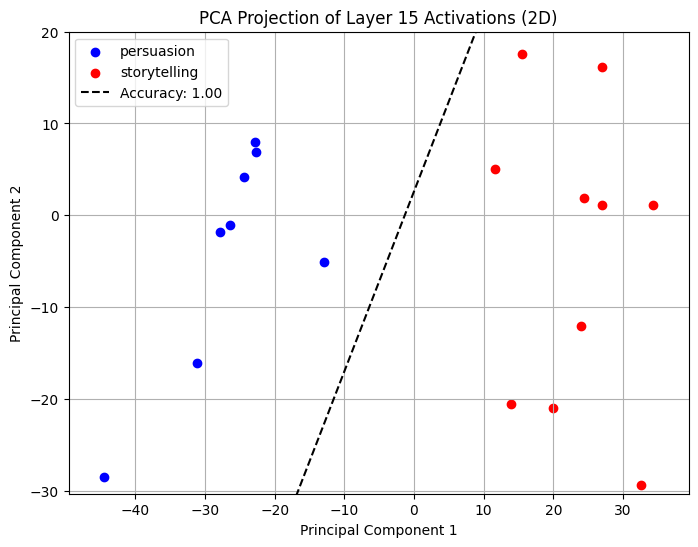

In [ ]:
# 2D Scatter plot


# Plot
layer_of_interest = 15
pca_result = layer_pca[layer_of_interest]

plt.figure(figsize=(8, 6))
persuasion_pca = pca_result[:10, :2]
story_pca = pca_result[10:, :2]

boundary = layer_clfs[layer_of_interest]

plt.scatter(persuasion_pca[:, 0], persuasion_pca[:, 1], color = "blue", label = "persuasion")
plt.scatter(story_pca[:, 0], story_pca[:, 1], color = "red", label = "storytelling")

# plot classification boundary

w0, w1 = boundary['weights']
b = boundary['bias']
x_min, x_max = (pca_result[:, 0].min() - 1, pca_result[:, 0].max() + 1)
y_min, y_max = (pca_result[:, 1].min() - 1, pca_result[:, 1].max() + 1)

print("xmin", x_min)
print("xmax", x_max)
# Decision boundary: y = -(w0 * x + b) / w1
x_vals = np.linspace(x_min, x_max, 200)
y_vals = -(w0 * x_vals + b) / w1

# Plot decision boundary
plt.plot(x_vals, y_vals, 'k--', label = f'Accuracy: {boundary["accuracy"]:.2f}')

# print("x_min", x_min)
# print("y_max", y_max)
# plt.text(x_min, y_max, f'Acc: {accuracy:.2f}', fontsize=10,
#          color='black')

plt.title(f"PCA Projection of Layer {layer_of_interest} Activations (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
ax = plt.gca()
ax.set_ylim([y_min, 20])
plt.legend()
# plt.tight_layout()
plt.show()


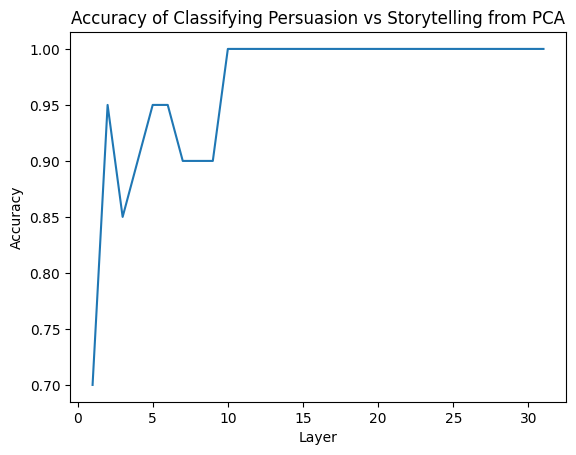

In [ ]:
layers = [i for i in range(1, 32)]
accuracy = [boundary["accuracy"] for boundary in layer_clfs][1:]
plt.title("Accuracy of Classifying Persuasion vs Storytelling from PCA")
plt.xlabel("Layer")
plt.ylabel("Accuracy")
plt.plot(layers, accuracy)

code below is old just basic how to do pca + get plots

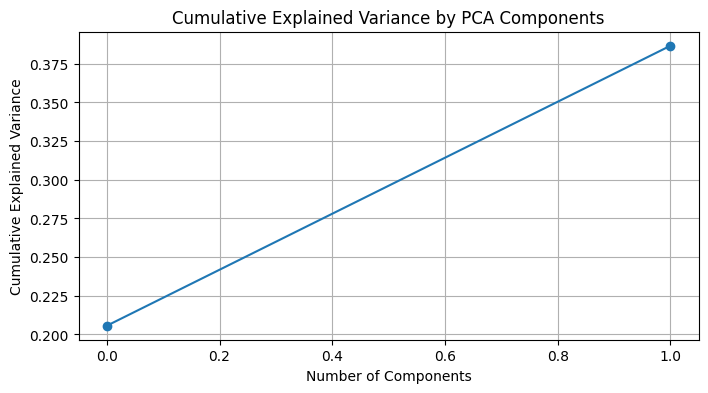

In [ ]:

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(activation_matrix)

# Plot explained variance
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()


In [ ]:
pca_result.shape

(20, 2)

In [ ]:
persuasion_pca = pca_result[:10, :2]
story_pca = pca_result[10:, :2]

In [ ]:
persuasion_pca.shape

(10, 2)

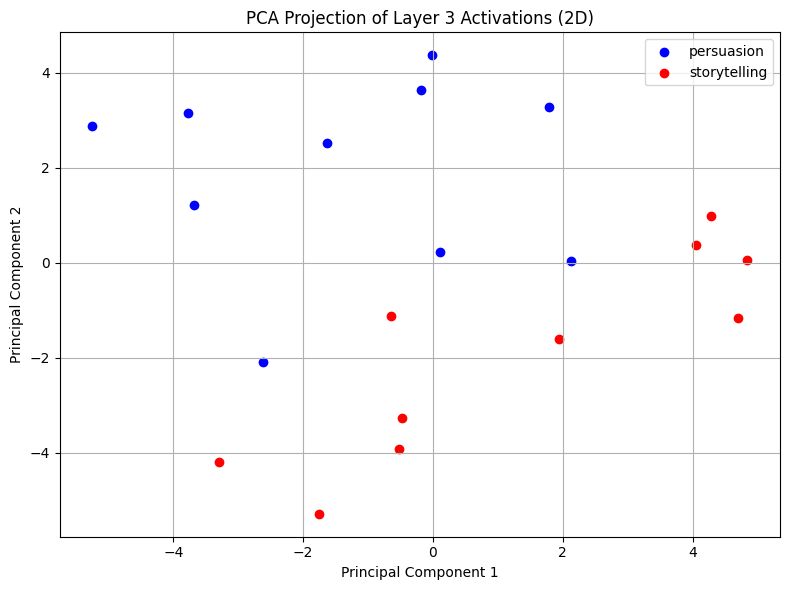

In [ ]:
# 2D Scatter plot

# colors = ['blue' if i < 10 else 'red' for i in range(20)]

# Plot
plt.figure(figsize=(8, 6))
persuasion_pca = pca_result[:10, :2]
story_pca = pca_result[10:, :2]

plt.scatter(persuasion_pca[:, 0], persuasion_pca[:, 1], color = "blue", label = "persuasion")
plt.scatter(story_pca[:, 0], story_pca[:, 1], color = "red", label = "storytelling")

plt.title("PCA Projection of Layer 3 Activations (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
